In [1]:
#%pip install pandas
# %pip install matplotlib

In [2]:
import numpy as np
import pandas as pd
import time

In [3]:
# mu = float
# sr = float


mu = vicosty , sr = shear rate

### Newtonian

In [4]:
# c = float(0.2)
def newtonian (c,sr):
    mu = c
    return mu

### Carreau Model

In [5]:

def carreau (mu0, mu_inf, time_const, P, n, sr):
    mu = mu_inf + (mu0 - mu_inf)*(1+(time_const * sr)**P)**((n-1)/P)
    return mu

### Casson model

In [6]:
#sqrt_tau_y = np.sqrt(tau_y)
#sqrt_muC = np.sqrt(muC)
def casson (sqrt_muC,sqrt_tau_y, sr):
    Sqrt_Tau = sqrt_muC*np.sqrt(sr)+ sqrt_Tau_y
    if True:
        pass

### Generalized Power-Law 

In [7]:

def gen_power(mu_inf, n_inf, delta_mu, delta_n, a,b,c,d, sr):
    k = mu_inf + delta_mu*np.exp(-(1+sr/a)*np.exp(-b/sr))
    n = n_inf-delta_n*np.exp(-(1+sr/c)*np.exp(-d/sr))
    mu=k*((sr)**(n-1))
    return mu

### Power-law model

In [8]:
def power_law(k, n, sr):
    mu=k*((sr)**(n-1))
    return mu

### Cross

In [9]:
def cross(mu0, mu_inf, time_const, n, sr):
    mu = mu_inf + (mu0-mu_inf)/(1+(time_const*sr)**n)
    return mu

### WS model

In [10]:
def ws (C1, C2, C3, C4, H, TPMA,sr):
    mu = C1*np.exp(C2*H)*np.exp(C4*(TPMA/H**2))*(sr)**(-C3*H)
    return mu

### HB model

In [11]:
def HB (k, n, tau_y, sr):
    mu = k*(sr)**(n-1) + (tau_y/sr)
    return mu

### Quemada Model 

In [12]:


def Quemada (sqrt_muC, sqrt_time_const, sqrt_tau_y, sr):
    mu = (sqrt_muC + (sqrt_tau_y)/(sqrt_time_const + np.sqrt(sr)))**2
    return mu

### KL

In [13]:
def KL (muC, tau_y, a1, a2, sr):
    mu = (1/sr)*(tau_y + muC*(a2*np.sqrt(sr)+a1*sr))
    return mu

## Timer Code

### Define SR

In [14]:
sr = np.logspace(
    -2, 
    3, 
    num=50000, 
    endpoint=True, 
    base=10.0, 
    dtype=None, 
    axis=0
)
sr = pd.Series(sr)
rheo_models = pd.DataFrame


### Define Varaibles with Refs

In [15]:
# Newton
cnewt = 0.2
# Power Law [71]
n, k = 0.7755, 0.01467
# Carreau [49]
mu0, mu_inf, time_const, P, n = 0.056, 0.00345, 3.313, 1, 0.3568
# Casson [45]
sqrt_muC, sqrt_tau_y = np.sqrt(0.002982), np.sqrt(0.02876)
#gen power [68]
gen_mu_inf, n_inf, delta_mu, delta_n, a, b, c, d = 0.0035, 1, 0.25, 0.45, 50, 3, 50, 4
#Cross [69]
cross_mu0, cross_mu_inf, cross_time_const, cross_n = 0.056, 0.00345, 1.007, 1.028
#Ws [52]
C1, C2, C3, C4, H, TPMA = 0.00797, 0.0608, 0.00499, 14.585, 40, 25.9
#Hb []
hb_k, hb_n, hb_tau_y = 0.0089721, 0.8601, 0.0175
#Quemade [68]
qu_sqrt_muC, qu_sqrt_time_const, qu_sqrt_tau_y = np.sqrt(0.002982), np.sqrt(4.020), np.sqrt(0.02876)
#KL
KL_muC, KL_tau_y, a1, a2 = 0.0035, 0.005, 1, 1.19523


In [16]:


# Modified timer to handle different arguments for each function
def timer(functions_with_args, run_name):
    results = pd.DataFrame({'sr': sr}) 

    # Initialize an empty DataFrame for timings
    timings = pd.DataFrame(index=[run_name])
    
    for func, args_kwargs in functions_with_args.items():
        # Extract args and kwargs from the dictionary
        args = args_kwargs.get('args', [])
        kwargs = args_kwargs.get('kwargs', {})
        
        # Timing the process for each function
        start_time = time.time()
        # mu = sr.apply(lambda x: func(x, *args, **kwargs))
        mu = sr.apply(lambda s: func(*args, s, **kwargs))
        end_time = time.time()

        # Time taken for the function
        time_taken = end_time - start_time

        print(f"\nTime taken to apply {func.__name__}: {time_taken} seconds")
        
        # Add the time taken to the timings DataFrame
        timings[func.__name__] = [time_taken]

        # Store the result of the function in the dictionary using function name
        results[func.__name__] = mu

    return results, timings




# Different arguments for each model
functions_with_args = {
    power_law: {'args': [k, n]},
    newtonian: {'args': [cnewt]},
    carreau: {'args': [mu0, mu_inf, time_const, P, n]},
    # casson: {'args': [sqrt_muC, sqrt_tau_y]},
    gen_power: {'args': [gen_mu_inf, n_inf, delta_mu, delta_n, a, b, c, d]},
    cross: {'args': [cross_mu0, cross_mu_inf, cross_time_const, cross_n]},
    ws: {'args': [C1, C2, C3, C4, H, TPMA]},
    HB: {'args': [hb_k, hb_n, hb_tau_y]},
    Quemada: {'args': [qu_sqrt_muC, qu_sqrt_time_const, qu_sqrt_tau_y]},
    KL: {'args': [KL_muC, KL_tau_y, a1, a2]}
}

# Apply the timer to all functions
rheo_models, timings = timer(functions_with_args, 'run1')





Time taken to apply power_law: 0.04926133155822754 seconds

Time taken to apply newtonian: 0.029323816299438477 seconds

Time taken to apply carreau: 0.0495302677154541 seconds

Time taken to apply gen_power: 0.37836337089538574 seconds

Time taken to apply cross: 0.0647740364074707 seconds

Time taken to apply ws: 0.4317450523376465 seconds

Time taken to apply HB: 0.04659152030944824 seconds

Time taken to apply Quemada: 0.12923145294189453 seconds

Time taken to apply KL: 0.20609450340270996 seconds


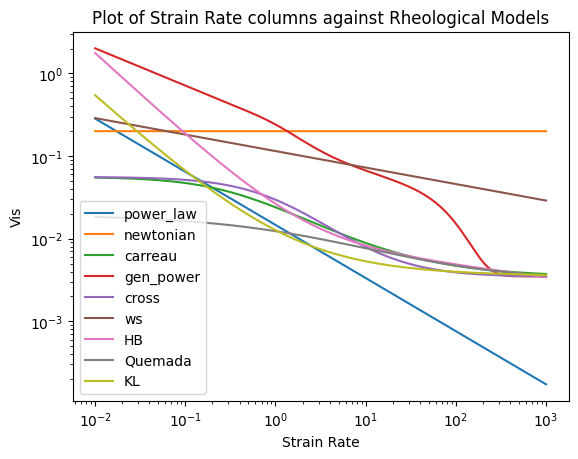

In [17]:
import matplotlib.pyplot as plt

rheo_models.plot(x = 'sr', kind='line', loglog=True)
plt.xlabel("Strain Rate")
plt.ylabel("Vis")
plt.title("Plot of Strain Rate columns against Rheological Models")
plt.show()

### Checking Graph

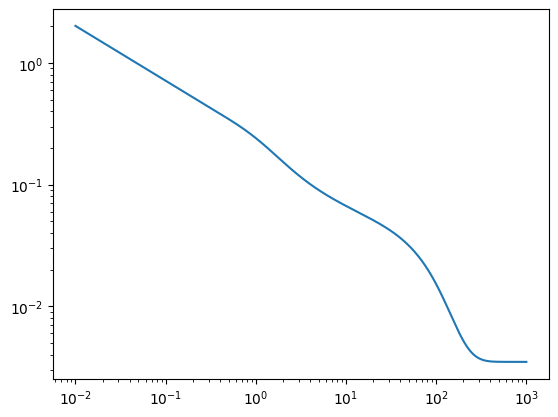

In [19]:
gen_mu = gen_power(gen_mu_inf, n_inf, delta_mu, delta_n, a, b, c, d, sr)
plt.loglog(sr, gen_mu)